In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from random import seed
from BikeTrackingWithDynamicWithoutStateRestore import BikeTrackingWithDynamicWithoutStateRestore
from oomodelling.ModelSolver import ModelSolver


In [24]:
m = BikeTrackingWithDynamicWithoutStateRestore()
m.tolerance = 0.2
m.horizon = 5.0
m.cooldown = 5.0
m.nsamples = 10
m.max_iterations = 20
m.time_step = 0.1
m.conv_xatol = 1e3
m.conv_fatol = 0.01

m.to_track.ddriver.nperiods = 2

ModelSolver().simulate(m, 0.0, 35.0, 0.1)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 341624
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
       3.49987255e+01, 3.49994150e+01, 3.50000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
        3.49987255e+01, 3.49994150e+01, 3.50000000e+01],
       [0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
        3.49987255e+01, 3.49994150e+01, 3.50000000e+01],
       [0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
        3.49987255e+01, 3.49994150e+01, 3.50000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.20785519e-07, 4.20504665e-07, 4.20266566e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.71621505e+00, 2.71621505e+00, 2.71621505e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.27

<IPython.core.display.Javascript object>


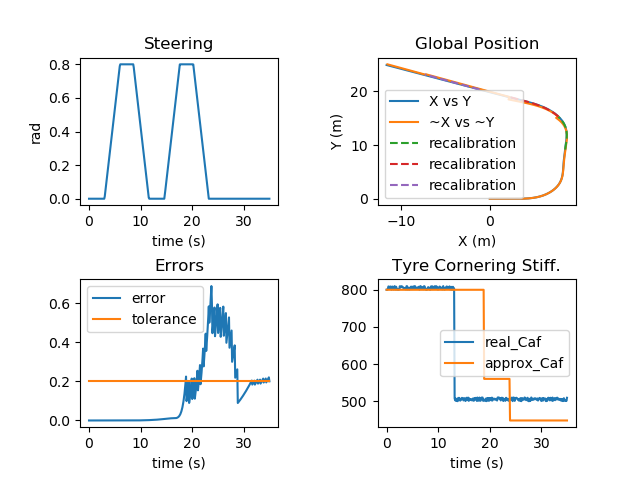

In [53]:
%matplotlib notebook

# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


_, ((p1, p2), (p3, p4)) = plt.subplots(2, 2)

p1.set_title("Steering")
p1.plot(m.signals['time'], m.to_track.ddriver.signals['steering'],
           label='steering')
p1.set_xlabel("time (s)")
p1.set_ylabel("rad")
p2.set_title("Global Position")
p2.plot(m.to_track.dbike.signals['X'], m.to_track.dbike.signals['Y'],
           label='X vs Y')
p2.plot(m.tracking.signals['X'], m.tracking.signals['Y'], label='~X vs ~Y')
for calib in m.recalibration_history:
    p2.plot(calib.xs[m.X_idx, :], calib.xs[m.Y_idx, :], '--', label='recalibration')
p2.set_xlabel("X (m)")
p2.set_ylabel("Y (m)")
p2.legend()
p3.set_title("Errors")
p3.plot(m.signals['time'], m.signals['error'], label='error')
p3.plot(m.signals['time'], [m.tolerance for t in m.signals['time']], label='tolerance')
p3.set_xlabel("time (s)")
p3.legend()
p4.set_title("Tyre Cornering Stiff.")
p4.plot(m.to_track.dbike.signals['time'], m.to_track.dbike.signals['Caf'], label='real_Caf')
p4.plot(m.tracking.signals['time'], m.tracking.signals['Caf'], label='approx_Caf')
p4.set_xlabel("time (s)")
p4.legend()

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)
plt.savefig('tracking_results.pdf', format='pdf')
plt.show()